In [1]:
import ComputationalHypergraphDiscovery as CHD

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
import jax.numpy as np
from jax import random
import joblib

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [3]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))

X=np.concatenate([W[:,:2],W],axis=1)
node_names1=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    

In [4]:
graph_discovery1=CHD.GraphDiscovery(X,node_names1)#,kernels=[CHD.Modes.LinearMode()])

Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.5009466479587517, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.5264126056675391, Z=(0.99, 1.00), gamma=2.22e+03
Kernel [gaussian] has n/(n+s)=0.004231243905589633, Z=(0.85, 0.87), gamma=5.92e-02
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


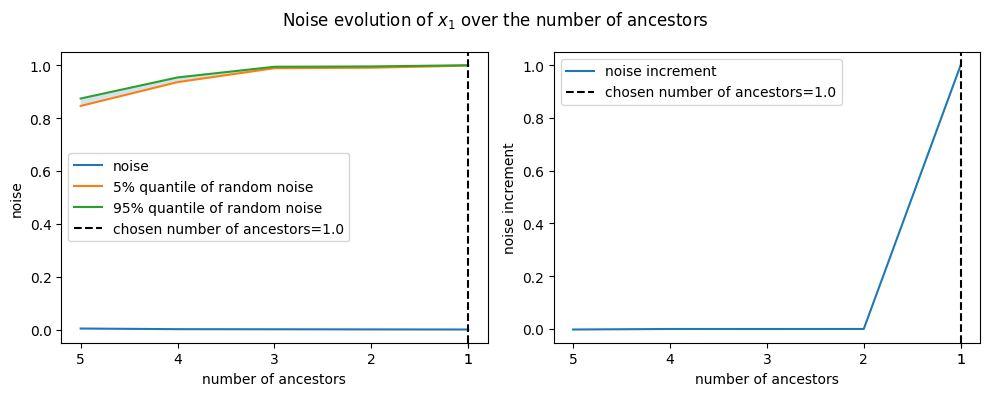

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.4983672408462726, Z=(1.00, 1.00), gamma=1.99e+03
Kernel [quadratic] has n/(n+s)=0.5210977786212314, Z=(0.99, 1.00), gamma=2.18e+03
Kernel [gaussian] has n/(n+s)=0.003991898127686009, Z=(0.84, 0.87), gamma=6.10e-02
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


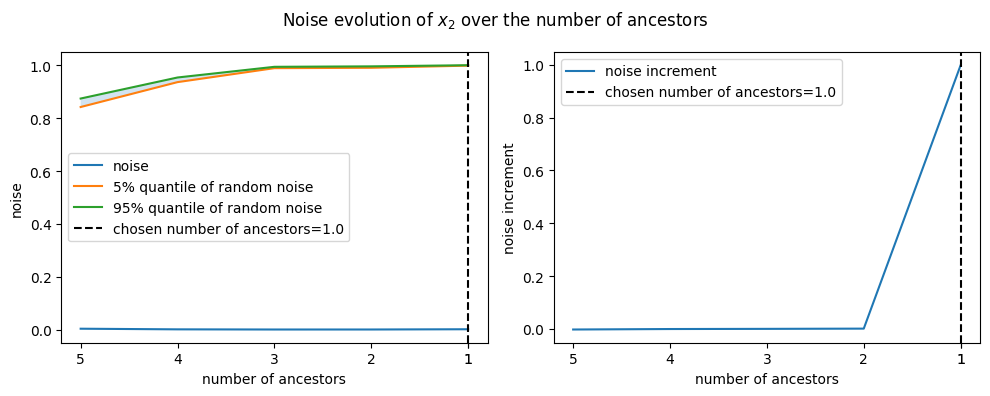

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.5009466479587517, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.5264126056675391, Z=(0.99, 1.00), gamma=2.22e+03
Kernel [gaussian] has n/(n+s)=0.004231243905589633, Z=(0.84, 0.88), gamma=5.92e-02
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


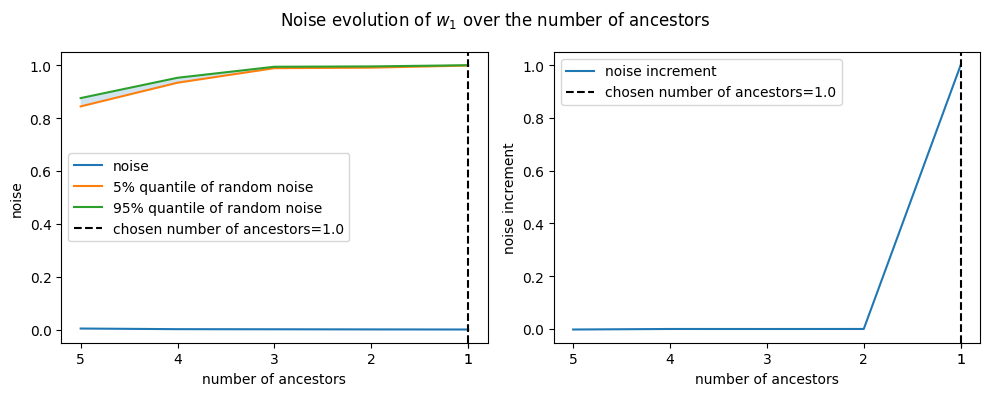

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.4983672408462726, Z=(1.00, 1.00), gamma=1.99e+03
Kernel [quadratic] has n/(n+s)=0.5210977786212315, Z=(0.99, 1.00), gamma=2.18e+03
Kernel [gaussian] has n/(n+s)=0.0039918981276847116, Z=(0.84, 0.87), gamma=6.10e-02
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


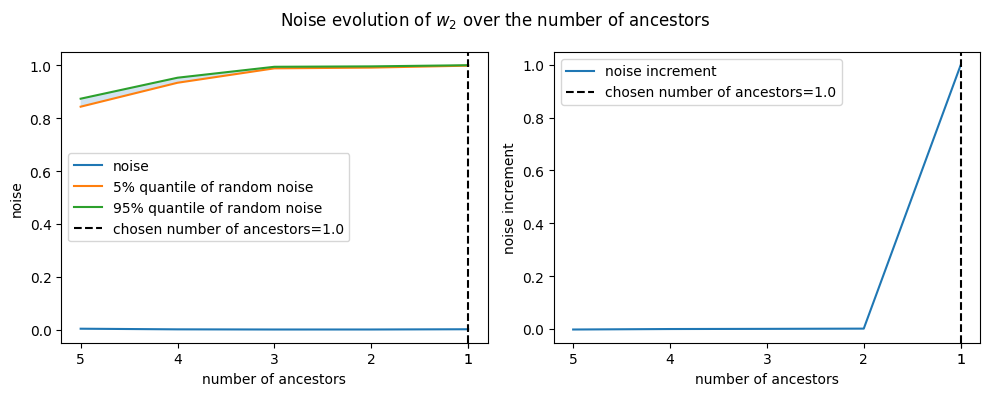

Ancestors of $w_2$: ['$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.999213464914225, Z=(1.00, 1.00), gamma=2.14e+03
Kernel [quadratic] has n/(n+s)=0.9972596827602122, Z=(1.00, 1.00), gamma=2.95e+03
Kernel [gaussian] has n/(n+s)=0.9316193565379305, Z=(0.93, 0.95), gamma=7.25e-04
$w_3$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9989590750598168, Z=(1.00, 1.00), gamma=2.52e+03
Kernel [quadratic] has n/(n+s)=0.9975260432297515, Z=(1.00, 1.00), gamma=3.22e+03
Kernel [gaussian] has n/(n+s)=0.9366263130460071, Z=(0.92, 0.94), gamma=7.83e-04
$w_4$ has no ancestors



In [5]:
graph_discovery1.fit()

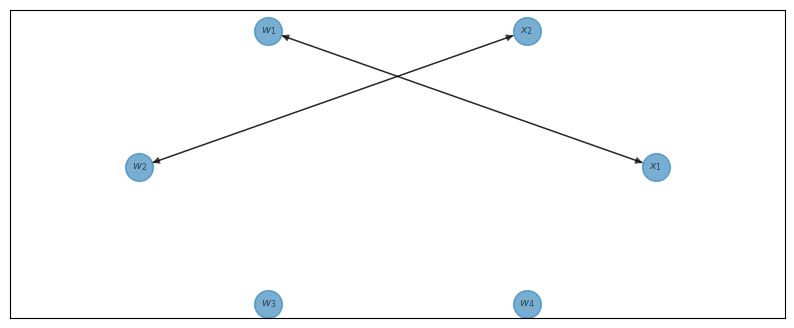

In [6]:
graph_discovery1.plot_graph(type_label=False)

In [7]:
joblib.dump(graph_discovery1, "example1.pkl")

['example1.pkl']

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [8]:

key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**2+1+0.1*W[:,1]
X3=W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names2=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']

In [9]:
graph_discovery2=CHD.GraphDiscovery(X,node_names2)

Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:09<00:00,  1.83s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.5022447067020335, Z=(1.00, 1.00), gamma=2.02e+03
Kernel [quadratic] has n/(n+s)=0.5638713703066652, Z=(0.99, 1.00), gamma=2.40e+03
Kernel [gaussian] has n/(n+s)=0.005430063249109314, Z=(0.84, 0.86), gamma=3.31e-01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


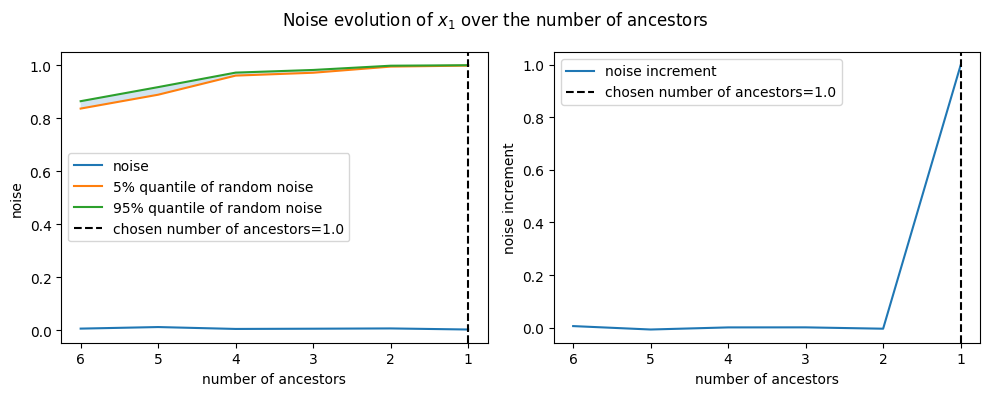

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.9938758978908687, Z=(1.00, 1.00), gamma=2.62e+03
Kernel [quadratic] has n/(n+s)=0.5661384822998425, Z=(0.99, 1.00), gamma=3.66e+03
Kernel [gaussian] has n/(n+s)=0.003160523934208827, Z=(0.84, 0.87), gamma=2.40e-01
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.17 after pruning)


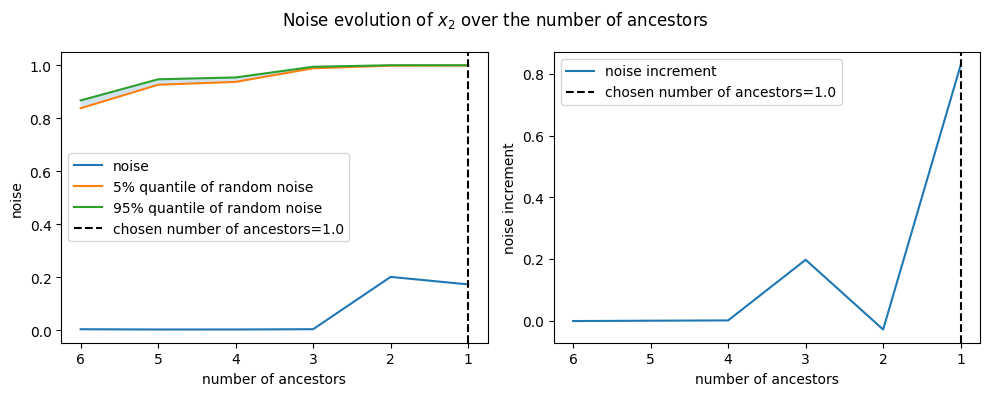

Ancestors of $x_2$: ['$w_1$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.5011764769138861, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.5142398240931204, Z=(0.99, 1.00), gamma=2.12e+03
Kernel [gaussian] has n/(n+s)=0.006680308637452141, Z=(0.84, 0.87), gamma=2.47e-01
$x_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


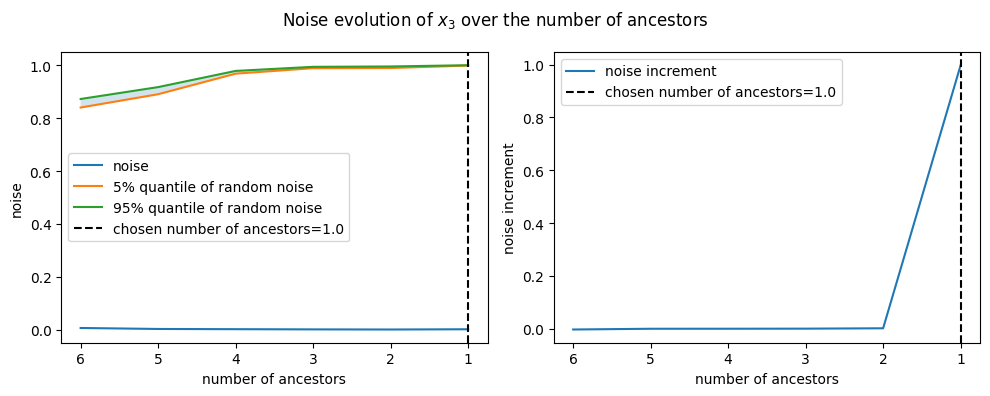

Ancestors of $x_3$: ['$w_3$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.5022447067020335, Z=(1.00, 1.00), gamma=2.02e+03
Kernel [quadratic] has n/(n+s)=0.5638713703066672, Z=(0.99, 1.00), gamma=2.40e+03
Kernel [gaussian] has n/(n+s)=0.0054300632491091705, Z=(0.84, 0.87), gamma=3.31e-01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


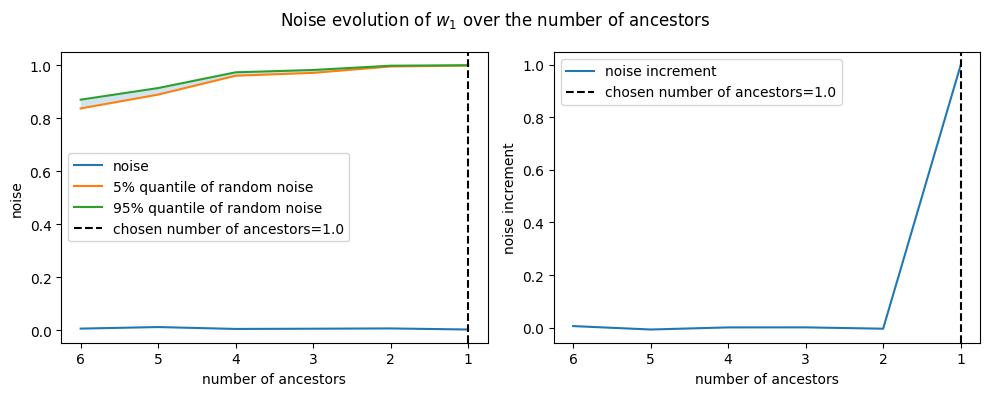

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9963875295244219, Z=(1.00, 1.00), gamma=1.91e+03
Kernel [quadratic] has n/(n+s)=0.9936210210713736, Z=(1.00, 1.00), gamma=3.26e+03
Kernel [gaussian] has n/(n+s)=0.019995770579599496, Z=(0.88, 0.91), gamma=8.84e-03
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


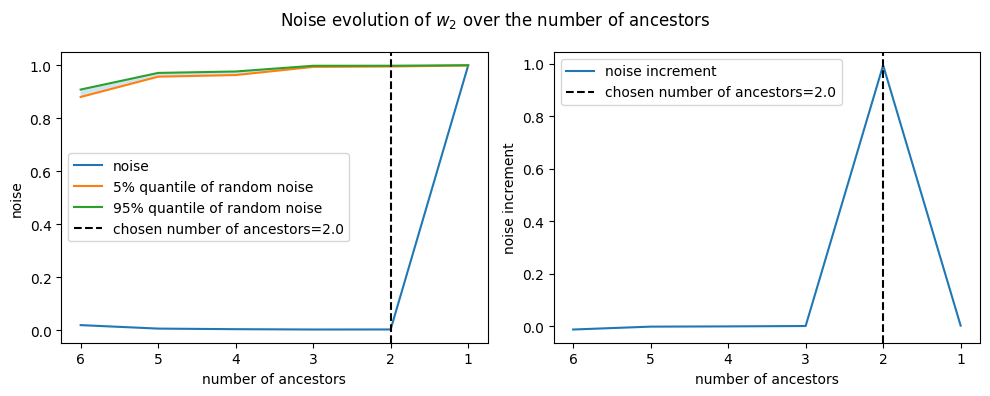

Ancestors of $w_2$: ['$x_2$', '$w_1$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.501176476913886, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.5142398240931203, Z=(0.99, 1.00), gamma=2.12e+03
Kernel [gaussian] has n/(n+s)=0.0066803086374512466, Z=(0.84, 0.87), gamma=2.47e-01
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


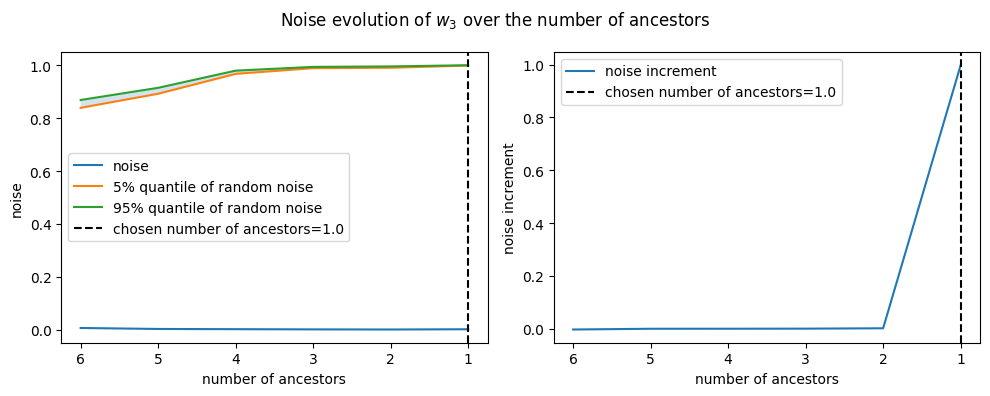

Ancestors of $w_3$: ['$x_3$']


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9991508825455864, Z=(1.00, 1.00), gamma=2.31e+03
Kernel [quadratic] has n/(n+s)=0.9966623198780747, Z=(1.00, 1.00), gamma=3.62e+03
Kernel [gaussian] has n/(n+s)=0.9157444929990223, Z=(0.92, 0.94), gamma=4.27e-03
$w_4$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.94 after pruning)


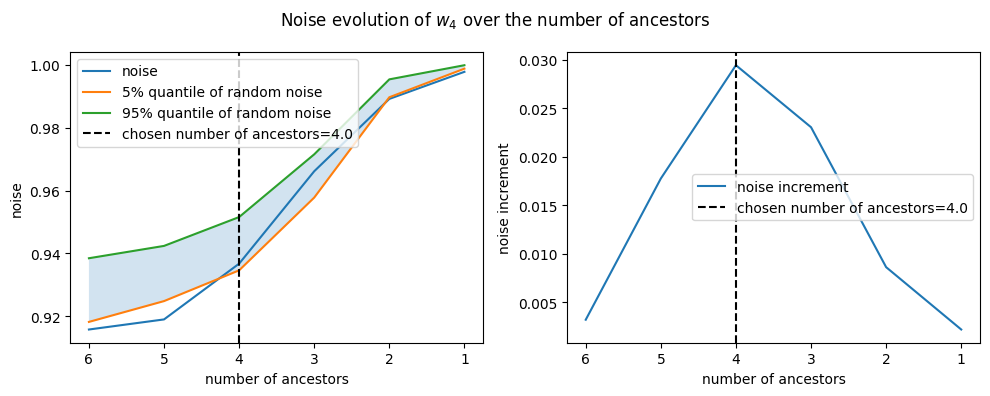

Ancestors of $w_4$: ['$x_1$', '$x_2$', '$w_2$', '$w_3$']



In [10]:
graph_discovery2.fit()

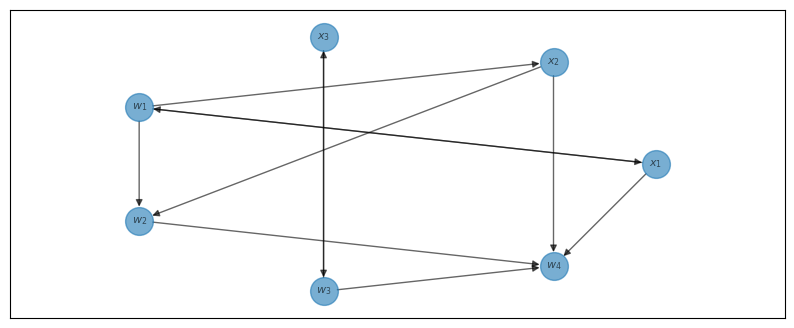

In [11]:
graph_discovery2.plot_graph(type_label=False)

In [12]:
joblib.dump(graph_discovery2, "example2.pkl")

['example2.pkl']

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [13]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]*W[:,1]
X2=W[:,1]*np.sin(W[:,3])
X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names3=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [14]:
graph_discovery3=CHD.GraphDiscovery(X,node_names3)

Finding ancestors with kernel [quadratic]: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]



Results for $w_4$
Kernel [linear] has n/(n+s)=0.9979168910991284, Z=(1.00, 1.00), gamma=2.04e+03
Kernel [quadratic] has n/(n+s)=0.9207846985645811, Z=(0.99, 1.00), gamma=5.23e+03
Kernel [gaussian] has n/(n+s)=0.8912072633839547, Z=(0.86, 0.89), gamma=4.55e-02
$w_4$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.92 after pruning)


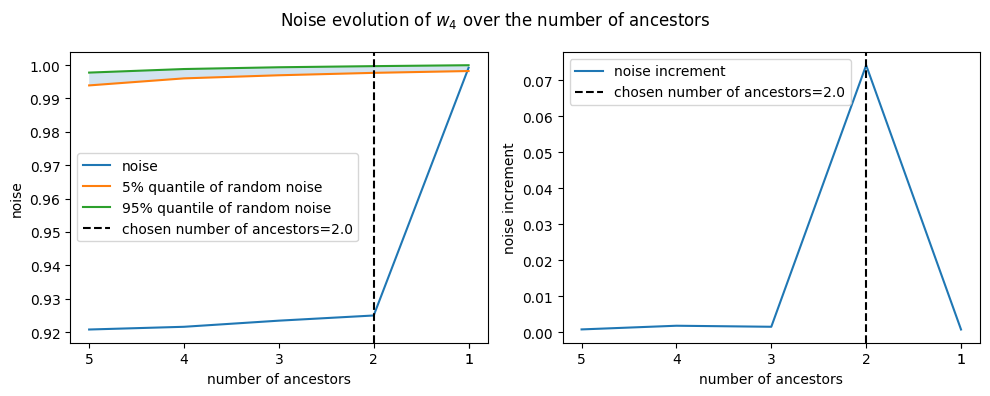

Ancestors of $w_4$: ['$x_2$', '$w_2$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.9995697260832344, Z=(1.00, 1.00), gamma=2.08e+03
Kernel [quadratic] has n/(n+s)=0.5011099856768774, Z=(0.99, 1.00), gamma=1.94e+03
Kernel [gaussian] has n/(n+s)=0.0012718423954207571, Z=(0.83, 0.86), gamma=1.14e-01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


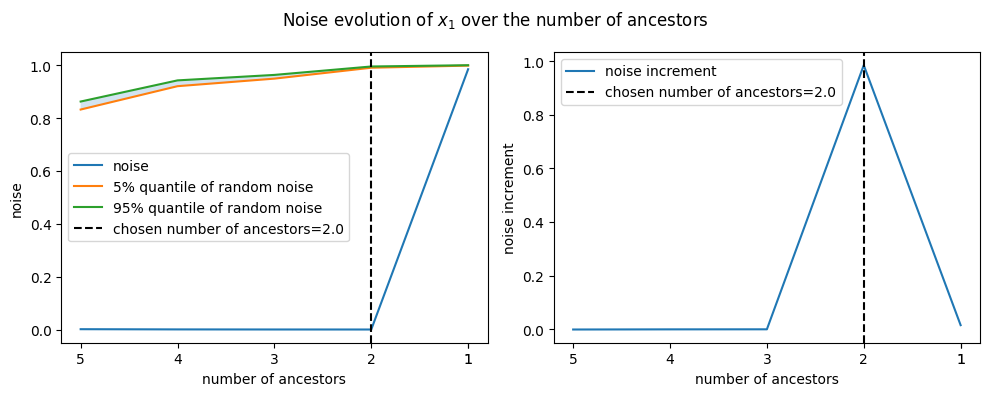

Ancestors of $x_1$: ['$w_1$', '$w_2$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.9987975330550911, Z=(1.00, 1.00), gamma=1.94e+03
Kernel [quadratic] has n/(n+s)=0.5689136980406807, Z=(0.99, 1.00), gamma=8.21e+02
Kernel [gaussian] has n/(n+s)=0.04605578527789154, Z=(0.84, 0.87), gamma=9.15e-02
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.07 after pruning)


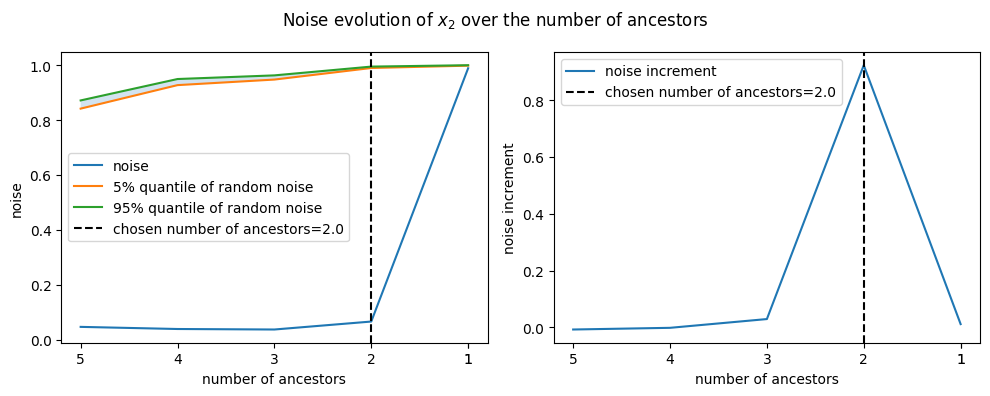

Ancestors of $x_2$: ['$w_2$', '$w_4$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.9984062536674957, Z=(1.00, 1.00), gamma=2.08e+03
Kernel [quadratic] has n/(n+s)=0.8944899576000857, Z=(0.99, 1.00), gamma=4.28e+03
Kernel [gaussian] has n/(n+s)=0.7801882996412444, Z=(0.95, 0.96), gamma=3.46e+01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.82 after pruning)


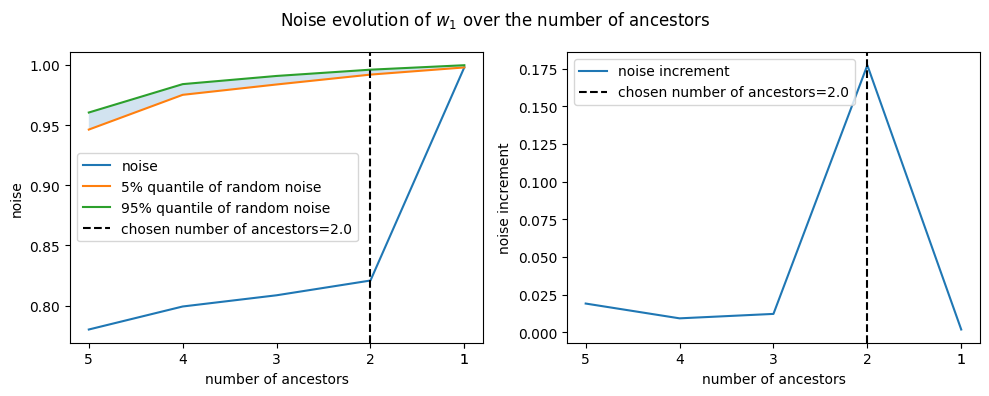

Ancestors of $w_1$: ['$x_1$', '$w_2$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9982563446913466, Z=(1.00, 1.00), gamma=1.94e+03
Kernel [quadratic] has n/(n+s)=0.7507843919875752, Z=(0.99, 1.00), gamma=3.03e+03
Kernel [gaussian] has n/(n+s)=0.6974673271952606, Z=(0.92, 0.94), gamma=1.28e+01
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.82 after pruning)


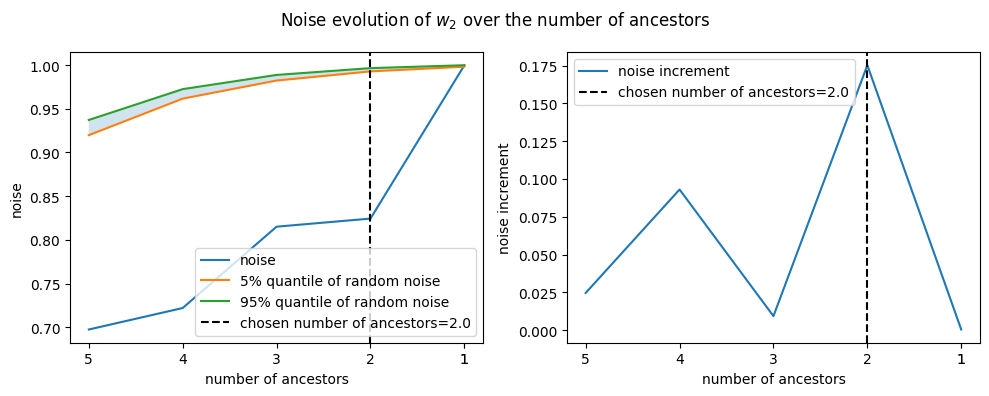

Ancestors of $w_2$: ['$x_1$', '$w_1$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9990698423095332, Z=(1.00, 1.00), gamma=1.98e+03
Kernel [quadratic] has n/(n+s)=0.9980110246694452, Z=(0.99, 1.00), gamma=7.77e+02
Kernel [gaussian] has n/(n+s)=0.9346251018458623, Z=(0.91, 0.93), gamma=3.98e-03
$w_3$ has no ancestors



In [15]:
graph_discovery3.fit()

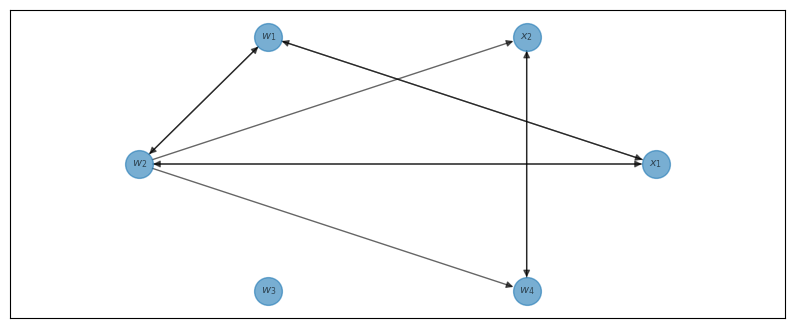

In [16]:
graph_discovery3.plot_graph(type_label=False)

In [17]:
joblib.dump(graph_discovery3, "example3.pkl")

['example3.pkl']

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [18]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**3+1+0.1*W[:,1]
X3=(X1+2)**3+0.1*W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names4=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [19]:
graph_discovery4=CHD.GraphDiscovery(X,node_names4)

Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.431068690105412, Z=(1.00, 1.00), gamma=1.97e+03
Kernel [quadratic] has n/(n+s)=0.4186501687436018, Z=(0.99, 1.00), gamma=1.84e+03
Kernel [gaussian] has n/(n+s)=0.003364713028118938, Z=(0.85, 0.88), gamma=1.63e-01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


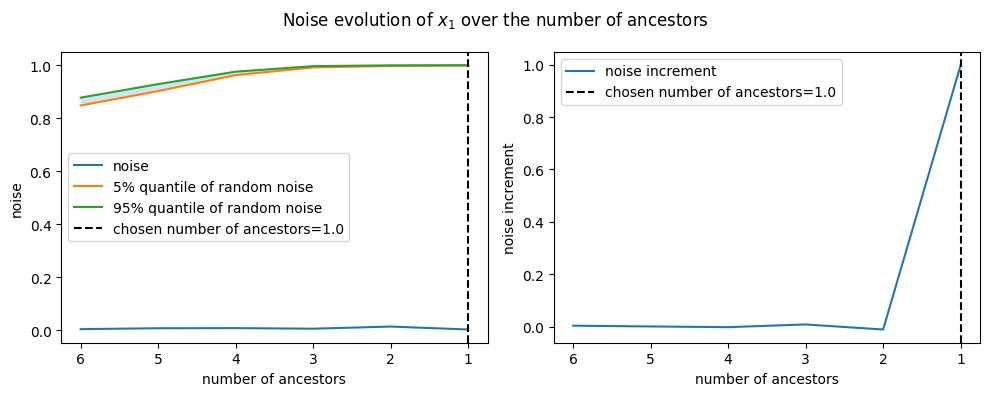

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.7549819217161625, Z=(1.00, 1.00), gamma=3.37e+03
Kernel [quadratic] has n/(n+s)=0.4579838226387628, Z=(0.99, 1.00), gamma=1.99e+03
Kernel [gaussian] has n/(n+s)=0.014176588855588394, Z=(0.84, 0.87), gamma=1.75e-01
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.27 after pruning)


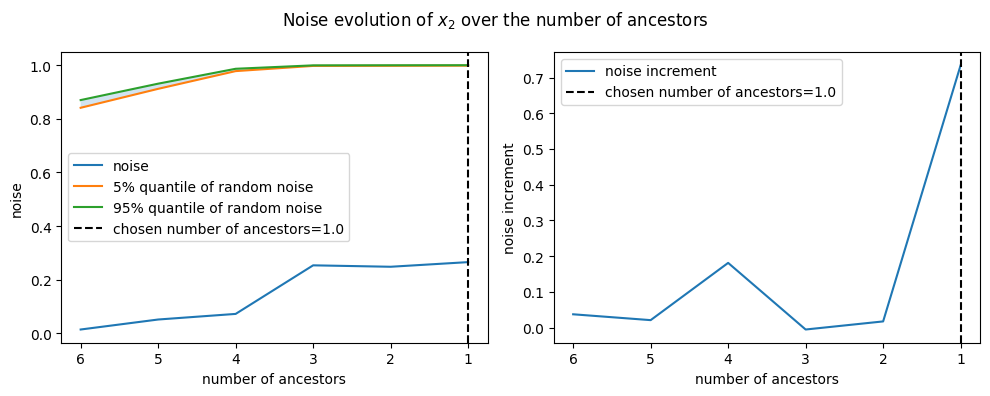

Ancestors of $x_2$: ['$w_1$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.6579842448045539, Z=(1.00, 1.00), gamma=2.64e+03
Kernel [quadratic] has n/(n+s)=0.35437642988469475, Z=(0.99, 1.00), gamma=2.02e+03
Kernel [gaussian] has n/(n+s)=0.0010476108812557897, Z=(0.84, 0.87), gamma=1.69e-01
$x_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.19 after pruning)


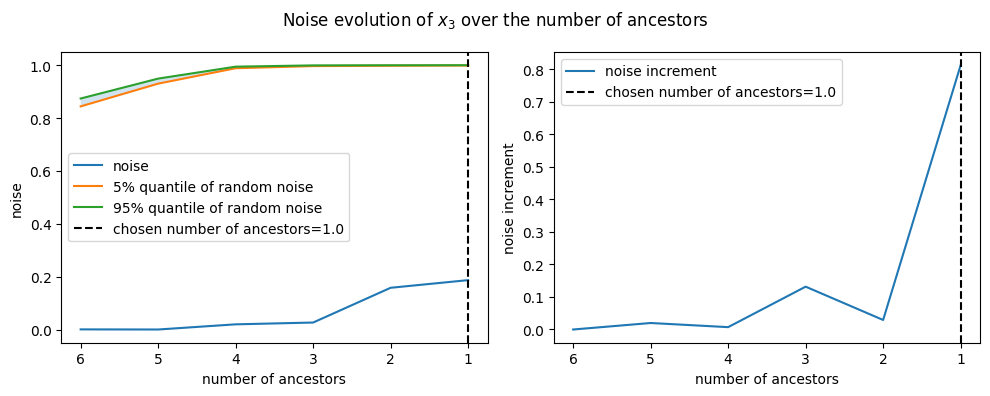

Ancestors of $x_3$: ['$w_1$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.431068690105412, Z=(1.00, 1.00), gamma=1.97e+03
Kernel [quadratic] has n/(n+s)=0.41865016874360145, Z=(0.99, 1.00), gamma=1.84e+03
Kernel [gaussian] has n/(n+s)=0.003364713028120181, Z=(0.85, 0.88), gamma=1.63e-01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


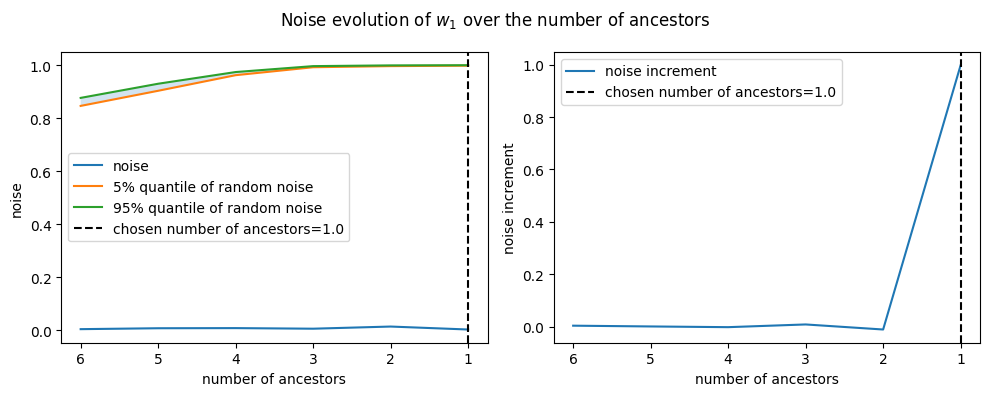

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9962609639050581, Z=(1.00, 1.00), gamma=5.80e+02
Kernel [quadratic] has n/(n+s)=0.9964814550035382, Z=(1.00, 1.00), gamma=1.76e+03
Kernel [gaussian] has n/(n+s)=0.03720777267159593, Z=(0.90, 0.92), gamma=1.50e-03
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.02 after pruning)


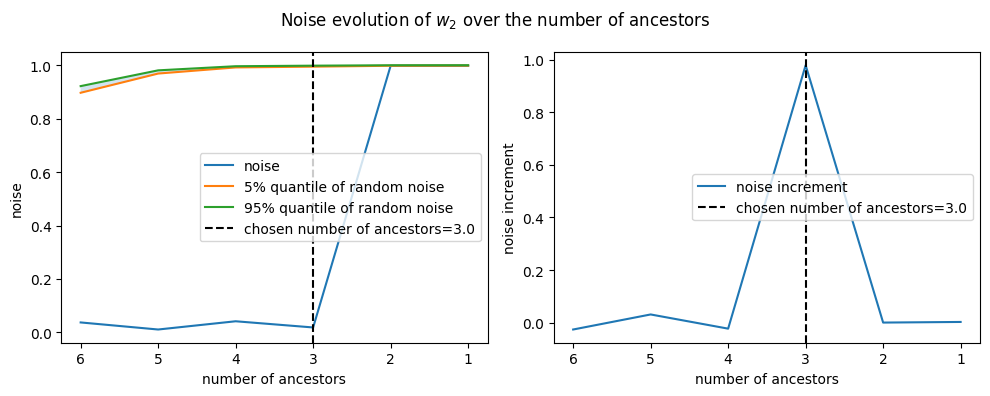

Ancestors of $w_2$: ['$x_1$', '$x_2$', '$w_1$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9996573425320772, Z=(1.00, 1.00), gamma=6.73e+02
Kernel [quadratic] has n/(n+s)=0.9978145549739207, Z=(1.00, 1.00), gamma=1.75e+03
Kernel [gaussian] has n/(n+s)=0.04258997919413846, Z=(0.91, 0.93), gamma=1.02e-03
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.14 after pruning)


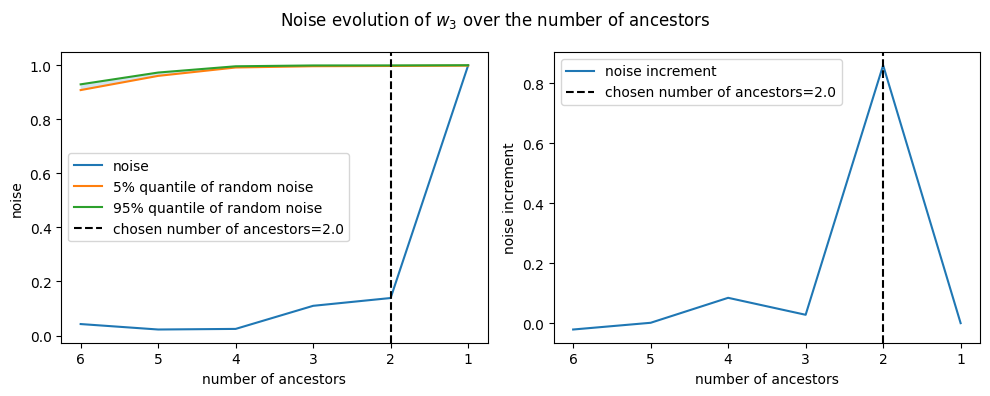

Ancestors of $w_3$: ['$x_3$', '$w_1$']


Results for $w_4$
Kernel [linear] has n/(n+s)=0.999531334827775, Z=(1.00, 1.00), gamma=6.80e+03
Kernel [quadratic] has n/(n+s)=0.9981424778252223, Z=(1.00, 1.00), gamma=2.59e+03
Kernel [gaussian] has n/(n+s)=0.9442563239526677, Z=(0.93, 0.95), gamma=1.82e-03
$w_4$ has no ancestors



In [20]:
graph_discovery4.fit()

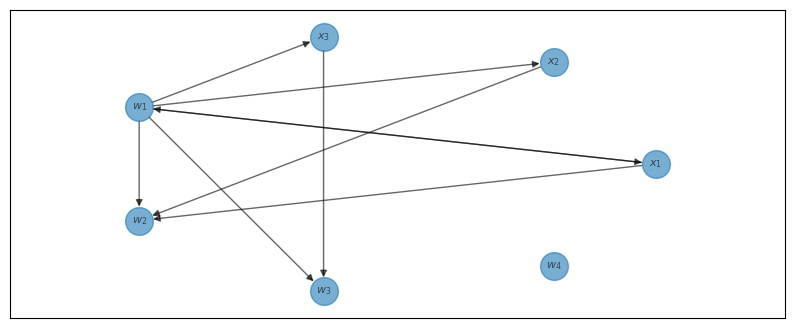

In [21]:
graph_discovery4.plot_graph(type_label=False)

In [22]:
joblib.dump(graph_discovery4, "example4.pkl")

['example4.pkl']

In [23]:
graph_discovery1.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=8.36e-06, noise=0.000524}
x_2
 = 1.0 * w_2 {kernel=gaussian, gamma=0.0666, noise=0.00196}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=8.36e-06, noise=0.000524}
w_2
 = 1.0 * x_2 {kernel=gaussian, gamma=0.0666, noise=0.00196}


In [24]:
graph_discovery2.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=0.0394, noise=0.00204}
x_2
 = 1.0 * w_1 {kernel=gaussian, gamma=102, noise=0.172}
x_3
 = 1.0 * w_3 {kernel=gaussian, gamma=0.0599, noise=0.00184}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=0.0394, noise=0.00204}
w_2
 = 1.0 * x_2 {kernel=gaussian, gamma=0.000169, noise=0.00362}
 + 1.0 * w_1 {kernel=gaussian, gamma=0.000169, noise=0.00362}
w_3
 = 1.0 * x_3 {kernel=gaussian, gamma=0.0599, noise=0.00184}
w_4
 = 1.0 * x_1 {kernel=gaussian, gamma=0.000612, noise=0.937}
 + 1.0 * x_2 {kernel=gaussian, gamma=0.000612, noise=0.937}
 + 1.0 * w_2 {kernel=gaussian, gamma=0.000612, noise=0.937}
 + 1.0 * w_3 {kernel=gaussian, gamma=0.000612, noise=0.937}


In [25]:
graph_discovery3.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=5.17e-06, noise=7.87e-05}
 + 1.0 * w_2 {kernel=gaussian, gamma=5.17e-06, noise=7.87e-05}
x_2
 = 1.0 * w_2 {kernel=gaussian, gamma=0.000405, noise=0.0655}
 + 1.0 * w_4 {kernel=gaussian, gamma=0.000405, noise=0.0655}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=9.42, noise=0.821}
 + 1.0 * w_2 {kernel=gaussian, gamma=9.42, noise=0.821}
w_2
 = 1.0 * x_1 {kernel=gaussian, gamma=9.68, noise=0.824}
 + 1.0 * w_1 {kernel=gaussian, gamma=9.68, noise=0.824}
w_4
 = 1.0 * x_2 {kernel=quadratic, gamma=5.68e+03, noise=0.925}
 + 1.0 * w_2 {kernel=quadratic, gamma=5.68e+03, noise=0.925}


In [26]:
graph_discovery4.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=0.0897, noise=0.00204}
x_2
 = 1.0 * w_1 {kernel=gaussian, gamma=0.338, noise=0.265}
x_3
 = 1.0 * w_1 {kernel=gaussian, gamma=0.402, noise=0.187}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=0.0897, noise=0.00204}
w_2
 = 1.0 * x_1 {kernel=gaussian, gamma=1.03e-06, noise=0.0184}
 + 1.0 * x_2 {kernel=gaussian, gamma=1.03e-06, noise=0.0184}
 + 1.0 * w_1 {kernel=gaussian, gamma=1.03e-06, noise=0.0184}
w_3
 = 1.0 * x_3 {kernel=gaussian, gamma=0.000218, noise=0.139}
 + 1.0 * w_1 {kernel=gaussian, gamma=0.000218, noise=0.139}
